In [1]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

<script>
// SHOW AND HIDE SOURCECODE
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code."></form>

<a href=notebook1.ipynb target="_blank">Start a new query!</a>
&nbsp
<a href=notebook2.ipynb target="_blank">See User Statustics!</a>
&nbsp

In [17]:
import math
import tabulate
import matplotlib.pyplot as plt
import numpy as np
import random
import wikipedia

from metrics.wordsOwnedArticle import wordsOwnedArticle
from metrics.Conflict_Score import conflictScore
from metrics.Conflict_Score import conflictScore_token_list
from metrics.conflictscore_Sort_by_Month import conflictScore_by_month
from metrics.api.pageEdits import *
from metrics.api.getArticleRevs import getArticleRevs
from metrics.api.getLastRevContent import getLastRevContent
from metrics.api.getTotalArticleContent import getTotalArticleContent
from metrics.api.getArticleRevs import getArticleRevs
from metrics.getMonthlyArticleWordsOwned import getMonthlyArticleWordsOwned
from metrics.getEditorArticleStrings import getEditorArticleStrings
from metrics.TimeSpentEditingSingleUser import TimeSpentEditingSingleUser
from metrics.ActionsperEditsSingleUser import ActionsperEditsSingleUser


from wordcloud import WordCloud

from IPython.display import Markdown as md
from IPython.display import HTML, display
from ipywidgets import widgets, interact,Button
from bokeh.io import show, output_notebook
from bokeh.plotting import *
from bokeh.layouts import widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

plotly.tools.set_credentials_file(username='fkramer', api_key='LmCFXvemFzCfOyuLsP9u')
plotly.tools.set_config_file(world_readable=True,sharing='public')

%store -r userid_input
%store -r username_input
%store -r article_name
%store -r article_id
%store -r TopConflictScore_df
%store -r editorActions_df2
%store -r wordsOwned_df
%store -r useVersion

In [11]:
print(article_name)
print(article_id)

Manned_Space_Flight_Network
18253359


In [18]:
md('# Userinformation for the User: %s and the Article %s'%(username_input,article_name))

# Userinformation for the User: LouScheffer and the Article Aluminium

In [19]:
print('Link to Article: https://en.wikipedia.org/wiki/%s' %(article_name))

Link to Article: https://en.wikipedia.org/wiki/Aluminium


In [4]:
md('### This table shows all monthly actions the wikipedia user %s has done in article %s'%(username_input,article_name))

### This table shows all monthly actions the wikipedia user LouScheffer has done in article Aluminium

In [21]:
editorArticleActions = editorActions_df2[editorActions_df2['pageid']== article_id]
ym_min = editorArticleActions[editorArticleActions['total_actions']!= 0].ym.min()
ym_max = editorArticleActions[editorArticleActions['total_actions']!= 0].ym.max()

editorArticleActions = editorArticleActions[(editorArticleActions.ym >= ym_min) & (editorArticleActions.ym <= ym_max)]

source = ColumnDataSource(editorArticleActions)

columns = [
        TableColumn(field="ym", title="Month"),
        TableColumn(field="article_name", title="Article"),
    
        TableColumn(field="total_adds", title="total_adds"),
        TableColumn(field="adds_stopword_count", title="adds_stopword_count"),
        TableColumn(field="adds_surv_48h", title="adds_surv_48h"),
        TableColumn(field="adds_survived_ratio", title="adds_survived_ratio"),
        TableColumn(field="total_dels", title="total_dels"),
        TableColumn(field="dels_stopword_count", title="dels_stopword_count"),
        TableColumn(field="dels_surv_48h", title="dels_surv_48h"),
        TableColumn(field="dels_survived_ratio", title="dels_survived_ratio"),
        TableColumn(field="total_reins", title="total_reins"),
        TableColumn(field="reins_stopword_count", title="reins_stopword_count"),
        TableColumn(field="reins_surv_48h", title="reins_surv_48h"),
        TableColumn(field="reins_survived_ratio", title="reins_survived_ratio"),
        TableColumn(field="total_actions", title="total_actions"),
        TableColumn(field="total_actions_stopword_count", title="total_actions_stopword_count"),
        TableColumn(field="total_actions_surv_48h", title="total_actions_surv_48h"),
        TableColumn(field="total_actions_survived_ratio", title="total_actions_survived_ratio"),
        TableColumn(field="pageviews", title="pageviews"),
        TableColumn(field="talkpage_entries", title="talkpage_entries")   
    ]
data_table = DataTable(source=source, columns=columns, width=1800, height=400)

output_notebook()

show(widgetbox(data_table))

Loading BokehJS ...

### Graphical representation of monthly activity

In [22]:
df4 = editorActions_df2[editorActions_df2['pageid'] == article_id].copy()
df4['ym']= pd.to_datetime(df4['ym'])

begin = list(df4['ym'])
end = sorted(begin, reverse=True)

In [23]:
def mActivity(begin,end):
    
    df4 = editorActions_df2[editorActions_df2['pageid'] == article_id].copy()
    df4['ym']= pd.to_datetime(df4['ym'])
    
    df4 = df4[(df4.ym >= begin) &(df4.ym <= end)]

    trace1 = go.Scatter(
        x = list(df4['ym']),y = list(df4.total_adds),
        mode = 'lines+markers',name = 'Adds',
        marker = dict(color = 'rgba(0, 128, 43, .8)'))

    trace2 = go.Scatter(
        x = list(df4['ym']),y = list(df4.total_dels),
        mode = 'lines+markers',name = 'Dels',
        marker = dict(color = 'rgba(255, 0, 0, .8)'))

    trace3 = go.Scatter(
        x = list(df4['ym']),y = list(df4.total_reins),
        mode = 'lines+markers',name = 'Reins',
        marker = dict(color = 'rgba(0, 51, 153, .8)'))

    layout= go.Layout(hovermode= 'closest',
        xaxis= dict(title= 'Month',ticklen= 5,zeroline= True,gridwidth= 2),
        yaxis=dict(title= 'Actions',ticklen= 5,gridwidth= 2),
        showlegend= True)

    data = [trace1,trace2,trace3]

    plotly.offline.init_notebook_mode(connected=True)
    plotly.offline.iplot({"data": data,"layout": layout})

a = interact(mActivity,begin=begin,end=end)

A Jupyter Widget

In [14]:
md('### This table shows the monthly course of number of words the wikipedia user %s owned in article %s'%(username_input,article_name))

### This table shows the monthly course of number of words the wikipedia user LouScheffer owned in article Aluminium

In [51]:
df_adds = editorArticleActions[editorArticleActions['total_adds']!=0]

if df_adds.empty:
    no_user_adds = 1

else:
    no_user_adds = 0    

In [52]:
import sys
import os.path, time

file = 'cache/%i_%s_MonthlyArticleWordsOwned_%s.csv' % (userid_input, username_input,article_name)

if (no_user_adds != 1):
    
    if os.path.isfile(file)== True:
     
        if useVersion == 'y' or useVersion == 'yes':              
            MonthlyArticleWordsOwned = pd.read_csv(file)
            %store MonthlyArticleWordsOwned
            print('Old dataset successfully loaded!')
                    
        elif useVersion =='n' or useVersion == 'no':
            print('You have started a new request. The active date set will be replaced. The process takes a few minutes!')              
            MonthlyArticleWordsOwned = getMonthlyArticleWordsOwned(userid_input,article_id)
            %store MonthlyArticleWordsOwned
            MonthlyArticleWordsOwned.to_csv("%s" %file, sep=',', encoding='utf-8')
        else:
            print('can not be the case')
    
    else:

        print('You have started a new request. There is no active date set. The process takes a few minutes!')
        MonthlyArticleWordsOwned = getMonthlyArticleWordsOwned(userid_input,article_id)
        %store MonthlyArticleWordsOwned
        MonthlyArticleWordsOwned.to_csv("%s" %file, sep=',', encoding='utf-8')

    if isinstance(MonthlyArticleWordsOwned, int) or MonthlyArticleWordsOwned.empty:
        ## divide dataframe into wordsowned and words_owned_ratio dataframes to seperately display them later
        monthlyWordsOwnedRatio = -1
        monthlyWordsOwned      = -1

    else:
        ## divide dataframe into wordsowned and words_owned_ratio dataframes to seperately display them later
        monthlyWordsOwnedRatio = MonthlyArticleWordsOwned[['ym', 'words_owned_ratio']].copy()
        monthlyWordsOwned      = MonthlyArticleWordsOwned[['ym', 'words_owned']].copy()
else:
    print(username_input+" added no content to article "+article_name+".")
    print("Logically he owns no words in it. :)")
    

Stored 'MonthlyArticleWordsOwned' (DataFrame)
Old dataset successfully loaded!


In [21]:
md('### This table describes the monthly course of words owned by user %s in article %s'%(username_input,article_name))

### This table describes the monthly course of words owned by user LouScheffer in article Aluminium

In [53]:
if (no_user_adds != 1):
    if isinstance(MonthlyArticleWordsOwned, int):
        print("Ouch.")
    
    else:
        source = ColumnDataSource(MonthlyArticleWordsOwned)
        columns = [
                TableColumn(field="ym", title="Month"),
                TableColumn(field="revision_id", title="Last revision_id of the month"),
                TableColumn(field="words_owned", title="Number of words owned by user"),
                TableColumn(field="words_owned_ratio", title="Words owned ratio"),   
            ]
        data_table = DataTable(source=source, columns=columns, width=1800, height=400)

        output_notebook()

        show(widgetbox(data_table))

Loading BokehJS ...

In [23]:
md('### Graphical representation of monthly words owned ratio')

### Graphical representation of monthly words owned ratio

In [54]:
if (no_user_adds != 1):    
    
    if isinstance(monthlyWordsOwnedRatio, int):
        print("The requested article was recently changed and is still processed by WikiWho.")
        print("Try again later or go back to NB2 to choose another article.")
    
    else:
        trace1 = go.Bar(
            x=list(monthlyWordsOwnedRatio['ym']),y=list(monthlyWordsOwnedRatio.words_owned_ratio),
            name='Words owned ratio',
            marker = dict(color = 'rgba(0, 51, 153, .8)'))

        layout= go.Layout(hovermode= 'closest',
            xaxis= dict(title= 'Month',ticklen= 5,zeroline= True,gridwidth= 2),
            yaxis=dict(title= 'Words owned ratio (in percentages)',ticklen= 5,gridwidth= 2),
            showlegend= True,barmode='group')

        data = [trace1]

        plotly.offline.init_notebook_mode(connected=True)
        plotly.offline.iplot({"data": data,"layout": layout})

In [25]:
md('### Graphical representation of monthly number of owned words')


### Graphical representation of monthly number of owned words

In [55]:
if (no_user_adds != 1):    
    
    if isinstance(monthlyWordsOwned, int):
        print("The requested article was recently changed and is still processed by WikiWho")
    
    else:
        trace1 = go.Bar(
            x=list(monthlyWordsOwned['ym']),y=list(monthlyWordsOwned.words_owned),
            name='Words owned',
            marker = dict(color = 'rgba(0, 51, 153, .8)'))

        layout= go.Layout(hovermode= 'closest',
            xaxis= dict(title= 'Month',ticklen= 5,zeroline= True,gridwidth= 2),
            yaxis=dict(title= 'Words owned',ticklen= 5,gridwidth= 2),
            showlegend= True,barmode='group')

        data = [trace1]

        plotly.offline.init_notebook_mode(connected=True)
        plotly.offline.iplot({"data": data,"layout": layout})


In [56]:
ArticleStringsDF = getEditorArticleStrings(userid_input, article_id)
del_df = ArticleStringsDF[ArticleStringsDF['action_type'] == "del"]
add_df = ArticleStringsDF[ArticleStringsDF['action_type'] == "add"]

wikipedia.set_lang("en")
query = wikipedia.page(article_name.replace("_", " "))
wordCloudList = query.content

listDel = list(del_df['string'])
listAdd = list(add_df['string'])

stringDel = ' '.join(del_df['string'])
stringAdd = ' '.join(add_df['string'])

In [57]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

### All added Tokens for this article

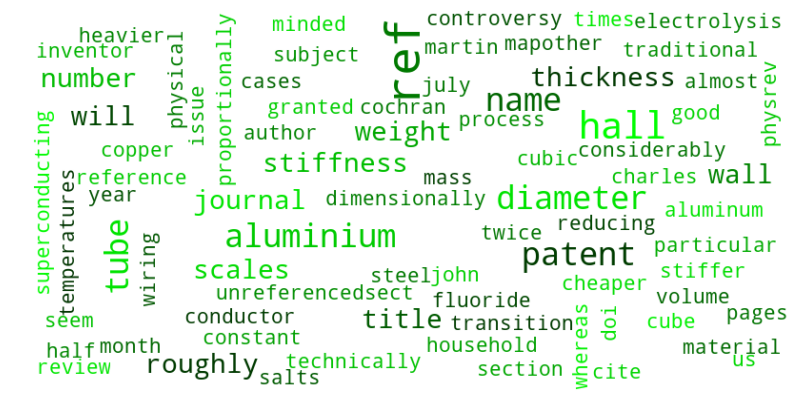

In [58]:
text = stringAdd

if len(text)>0:

    wc = WordCloud(width=800, height=400,background_color='white',max_font_size = 50,collocations=False).generate(text.lower())

    color_to_words = {'#00ff00': listAdd}

    default_color = 'grey'
    grouped_color_func = GroupedColorFunc(color_to_words, default_color)
    wc.recolor(color_func=grouped_color_func)

    # Plot
    plt.figure(figsize=(14,7))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print('No words added by user!')

In [59]:
add_drop = add_df
add_table = add_drop.groupby('string').count().sort_values(by=['action_type'],ascending=False)

source = ColumnDataSource(add_table.reset_index())

columns = [
        TableColumn(field="string", title="Added Tokens"),
        TableColumn(field="action_type", title="Quantity")]
data_table = DataTable(source=source, columns=columns, width=500, height=300)
output_notebook()
show(widgetbox(data_table))

Loading BokehJS ...

### All deleted Tokens for this article

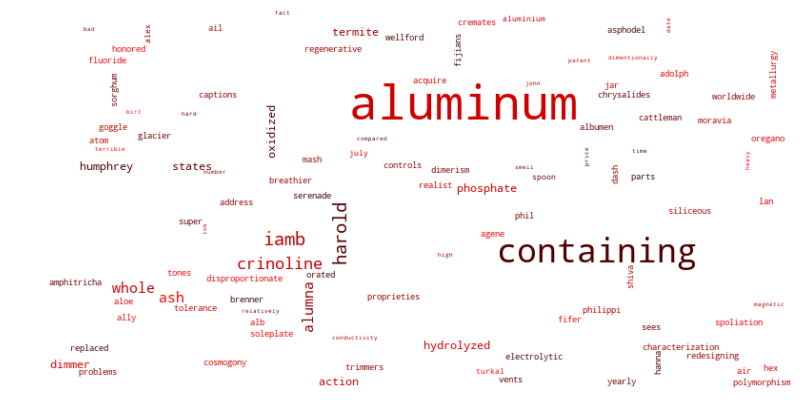

In [60]:
text = stringDel

if len(text)>0:
    wc = WordCloud(width=800, height=400,background_color='white',max_font_size = 50,collocations=False).generate(text.lower())

    color_to_words = {'red': listDel}

    default_color = 'grey'
    grouped_color_func = GroupedColorFunc(color_to_words, default_color)
    wc.recolor(color_func=grouped_color_func)

    # Plot
    plt.figure(figsize=(14,7))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

else:
    print('No words added by user!')

In [61]:
del_drop = del_df
del_table = del_drop.groupby('string').count().sort_values(by=['action_type'],ascending=False)

source = ColumnDataSource(del_table.reset_index())

columns = [
        TableColumn(field="string", title="Deleted Tokens"),
        TableColumn(field="action_type", title="Quantity")]
data_table = DataTable(source=source, columns=columns, width=500, height=300)
output_notebook()
show(widgetbox(data_table))

Loading BokehJS ...

### Show deleted and added Tokens for a selected period

The table below shows all tokens added by the author. You can use the filter to restrict the tokens.

#### Added Tokens

In [62]:
beginL = sorted(add_df['rev_ts'], reverse=False)
beginL = list(set(beginL))
endL = sorted(add_df.rev_ts, reverse=True)
endL = list(set(endL))
sWords = {'without Stopwords': 1, 'only Stopwords': 0, 'both':2}
surviveR = {'survived 48h': 1, 'not survived 48h': 0, 'both':2}

def filterAdds(begin,end,Stopwords,survived_48h_ind,head):
    
    add_df = ArticleStringsDF[ArticleStringsDF['action_type'] == "add"]
    
    if begin < end or begin == end:
    
        if Stopwords ==0 or Stopwords ==1:    
            if survived_48h_ind == 0 or survived_48h_ind == 1:
                add_df = add_df[(add_df.rev_ts >= begin) &(add_df.rev_ts <= end)&(add_df.survived_48h_ind == survived_48h_ind)&(add_df.is_stopword_ind == Stopwords)]    
            elif survived_48h_ind ==2:
                add_df = add_df[(add_df.rev_ts >= begin) &(add_df.rev_ts <= end)&(add_df.is_stopword_ind == Stopwords)]
            else:
                print('Can not be the case! surviveR not 0,1 or 2 at Stopwords 0 or 1!')
            
        elif Stopwords ==2:
            if survived_48h_ind == 0 or survived_48h_ind == 1:
                add_df = add_df[(add_df.rev_ts >= begin) &(add_df.rev_ts <= end)&(add_df.survived_48h_ind == survived_48h_ind)]
            elif survived_48h_ind == 2:
                add_df = add_df[(add_df.rev_ts >= begin) &(add_df.rev_ts <= end)]
            else:
                print('Can not be the case! surviveR not 0,1 or 2 at Stopwords 2!')
            
        else:
            print('Can not be the case! Stopwords not 0,1 or 2!')
            
    elif end < begin:
        variable = end
        end = begin
        begin = variable
        
        if Stopwords ==0 or Stopwords ==1:    
            if survived_48h_ind == 0 or survived_48h_ind == 1:
                add_df = add_df[(add_df.rev_ts >= begin) &(add_df.rev_ts <= end)&(add_df.survived_48h_ind == survived_48h_ind)&(add_df.is_stopword_ind == Stopwords)]    
            elif survived_48h_ind ==2:
                add_df = add_df[(add_df.rev_ts >= begin) &(add_df.rev_ts <= end)&(add_df.is_stopword_ind == Stopwords)]
            else:
                print('Can not be the case! surviveR not 0,1 or 2 at Stopwords 0 or 1!')
            
        elif Stopwords ==2:
            if survived_48h_ind == 0 or survived_48h_ind == 1:
                add_df = add_df[(add_df.rev_ts >= begin) &(add_df.rev_ts <= end)&(add_df.survived_48h_ind == survived_48h_ind)]
            elif survived_48h_ind == 2:
                add_df = add_df[(add_df.rev_ts >= begin) &(add_df.rev_ts <= end)]
            else:
                print('Can not be the case! surviveR not 0,1 or 2 at Stopwords 2!')
            
        else:
            print('Can not be the case! Stopwords not 0,1 or 2!')
    else:
        print('Date Filter Error!')
                
        
    a = add_df.groupby('string').size().reset_index().rename(columns={0:'count'})
    a = a.sort_values(by='count',ascending=False).head(head)
    print(a)
        
    try:

        text = ' '.join(list(a['string']))
        
        wc = WordCloud(max_words=100,width=800, height=400,background_color='black',max_font_size = 50,colormap="Greens").generate(text)
        plt.figure(figsize=(10,5))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    except ValueError:
        print('It is not possible to create a WordCloud with this filter!')
      
interactAdd = interact(filterAdds,begin=beginL,end=endL,Stopwords=sWords, survived_48h_ind=surviveR,head=widgets.IntSlider(min=1,max=len(add_df),step=1,value=10))

A Jupyter Widget

#### Deleted Tokens

In [63]:
beginL = list(del_df.rev_ts)
beginL = list(set(beginL))
endL = sorted(del_df.rev_ts, reverse=True)
endL = list(set(endL))
sWords = {'without Stopwords': 1, 'only Stopwords': 0, 'both':2}
surviveR = {'survived 48h': 1, 'not survived 48h': 0, 'both':2}


def filterDel(begin,end,Stopwords,survived_48h_ind,head):
    
    
    del_df = ArticleStringsDF[ArticleStringsDF['action_type'] == "del"]
    #print (Stopwords)
    #print(survived_48h_ind)
    
    if begin < end or begin == end:
    
        if Stopwords ==0 or Stopwords ==1:    
            if survived_48h_ind == 0 or survived_48h_ind == 1:
                del_df = del_df[(del_df.rev_ts >= begin) &(del_df.rev_ts <= end)&(del_df.survived_48h_ind == survived_48h_ind)&(del_df.is_stopword_ind == Stopwords)]    
            elif survived_48h_ind ==2:
                del_df = del_df[(del_df.rev_ts >= begin) &(del_df.rev_ts <= end)&(del_df.is_stopword_ind == Stopwords)]
            else:
                print('Can not be the case! surviveR not 0,1 or 2 at Stopwords 0 or 1!')
            
        elif Stopwords ==2:
            if survived_48h_ind == 0 or survived_48h_ind == 1:
                del_df = del_df[(del_df.rev_ts >= begin) &(del_df.rev_ts <= end)&(del_df.survived_48h_ind == survived_48h_ind)]
            elif survived_48h_ind == 2:
                del_df = del_df[(del_df.rev_ts >= begin) &(del_df.rev_ts <= end)]
            else:
                print('Can not be the case! surviveR not 0,1 or 2 at Stopwords 2!')
            
        else:
            print('Can not be the case! Stopwords not 0,1 or 2!')
            
    elif end < begin:
        variable = end
        end = begin
        begin = variable
        
        if Stopwords ==0 or Stopwords ==1:    
            if survived_48h_ind == 0 or survived_48h_ind == 1:
                del_df = del_df[(del_df.rev_ts >= begin) &(del_df.rev_ts <= end)&(del_df.survived_48h_ind == survived_48h_ind)&(del_df.is_stopword_ind == Stopwords)]    
            elif survived_48h_ind ==2:
                del_df = del_df[(del_df.rev_ts >= begin) &(del_df.rev_ts <= end)&(del_df.is_stopword_ind == Stopwords)]
            else:
                print('Can not be the case! surviveR not 0,1 or 2 at Stopwords 0 or 1!')
            
        elif Stopwords ==2:
            if survived_48h_ind == 0 or survived_48h_ind == 1:
                del_df = del_df[(del_df.rev_ts >= begin) &(del_df.rev_ts <= end)&(del_df.survived_48h_ind == survived_48h_ind)]
            elif survived_48h_ind == 2:
                del_df = del_df[(del_df.rev_ts >= begin) &(del_df.rev_ts <= end)]
            else:
                print('Can not be the case! surviveR not 0,1 or 2 at Stopwords 2!')
            
        else:
            print('Can not be the case! Stopwords not 0,1 or 2!')
    else:
        print('Date Filter Error!')
                
        
    a = del_df.groupby('string').size().reset_index().rename(columns={0:'count'})
    a = a.sort_values(by='count',ascending=False).head(head)
    print(a)
      
    try:
        text = ' '.join(list(a['string']))
        
        wc = WordCloud(max_words=100,width=800, height=400,background_color='white',max_font_size = 50,colormap="Reds").generate(text)
        plt.figure(figsize=(10,5))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    except ValueError:
        print('It is not possible to create a WordCloud with this filter!')
    
interactDel = interact(filterDel,begin=beginL,end=endL,Stopwords=sWords, survived_48h_ind=surviveR,head=widgets.IntSlider(min=0,max=len(del_df),step=1,value=10))

A Jupyter Widget

### Userrelated Metrics for this article

In [64]:
articleContent_df = getLastRevContent(article_id)
Actions_per_Edits = ActionsperEditsSingleUser(article_id,str(userid_input))
TimeSpend = TimeSpentEditingSingleUser(article_id, str(userid_input)) 

In [65]:
wordsOwnedList = wordsOwnedArticle(articleContent_df, userid_input, article_id)

In [66]:
revisions = getArticleRevs(article_id)
article = getTotalArticleContent(article_id)

In [67]:
TopConflictScore_df = TopConflictScore_df[TopConflictScore_df['pageid']==article_id].reset_index(drop=True)

table = [
         ['Words owned [%]',wordsOwned_df.words_owned_ratio[0]],
         ['Words owned [total]',wordsOwned_df.words_owned[0]],
         ['Actions per Edits Within one Hour',round(Actions_per_Edits.ActionsperEditsWithinHour[0],2)],
         ['Actions per Edits After one Hour',round(Actions_per_Edits.ActionsperEditsAfterHour[0],2)],
         ['Actions per Edits Exactly in one Hour',round(Actions_per_Edits.ActionsperEditsExactlyinHour[0],2)],
         ['Sessions Within one Hour',TimeSpend.SessionsWithinHour.item()],
         ['Sessions After one Hour',TimeSpend.SessionsAfterHour.item()],
         ['Sessions Exactly in one Hour',TimeSpend.SessionsExactlyinHour.item()]
        ]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Words owned [%],30.3771
Words owned [total],5905
Actions per Edits Within one Hour,37.04
Actions per Edits After one Hour,62.96
Actions per Edits Exactly in one Hour,0
Sessions Within one Hour,10
Sessions After one Hour,17
Sessions Exactly in one Hour,0


### Conflict Score

#### Conflict Score by Month

In [68]:
import os.path, time

file = 'cache/%i_%s_conflictScoreMonth_%s.csv' % (userid_input, username_input,article_name)

if os.path.isfile(file)== True:
     
    if useVersion == 'y' or useVersion == 'yes':              
        conflictScoreMonth_df = pd.read_csv(file)
        %store conflictScoreMonth_df
        print('Old dataset successfully loaded!')
                    
    elif useVersion =='n' or useVersion == 'no':
        print('You have started a new request. The active date set will be replaced. The process takes a few minutes!')              
        conflictScoreMonth_df = conflictScore_by_month(article, str(userid_input), revisions)
        %store conflictScoreMonth_df
        conflictScoreMonth_df.to_csv("%s" %file, sep=',', encoding='utf-8')
    else:
        print('can not be the case')
    
else:

    print('You have started a new request. There is no active date set. The process takes a few minutes!')
    conflictScoreMonth_df= conflictScore_by_month(article, str(userid_input), revisions)
    %store conflictScoreMonth_df
    conflictScoreMonth_df.to_csv("%s" %file, sep=',', encoding='utf-8')

Stored 'conflictScoreMonth_df' (DataFrame)
Old dataset successfully loaded!


In [69]:
source = ColumnDataSource(conflictScoreMonth_df)

columns = [
        TableColumn(field="ym", title="Month"),
        TableColumn(field="conflictscore", title="Conflict Score")]
data_table = DataTable(source=source, columns=columns, width=800, height=300)
output_notebook()
show(widgetbox(data_table))

Loading BokehJS ...

#### Visualization of Conflict Score by month

In [71]:
extendedDate = (conflictScoreMonth_df['ym'])
extendedDate = pd.to_datetime(extendedDate)

trace4 = go.Scatter(
    x = list(extendedDate),y = list(conflictScoreMonth_df.conflictscore),
    mode = 'lines+markers',name = 'Conflict',
    marker = dict(color = 'rgba(0, 51, 153, .8)'))

layout= go.Layout(title= 'Conflict Overview',hovermode= 'closest',
    xaxis= dict(title= 'Month',ticklen= 5,zeroline= True,gridwidth= 2),
    yaxis=dict(title= 'Conflicts',ticklen= 5,gridwidth= 2),
    showlegend= True)

data = [trace4]

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({"data": data,"layout": layout})

#### Conflict Score Token List

In [44]:
conflictTokenList = conflictScore_token_list(article, str(userid_input), revisions)

In [45]:
conflictTokenList = conflictTokenList[(conflictTokenList['conflictscore'] > 0)]

source = ColumnDataSource(conflictTokenList)

columns = [
        TableColumn(field='token_id', title='Token Id'),
        TableColumn(field="str", title="String"),
        TableColumn(field='conflictscore',title='Conflict Score'),
        TableColumn(field="actions",title="Actions")]
data_table = DataTable(source=source, columns=columns, width=800, height=300)
output_notebook()
show(widgetbox(data_table))

Loading BokehJS ...

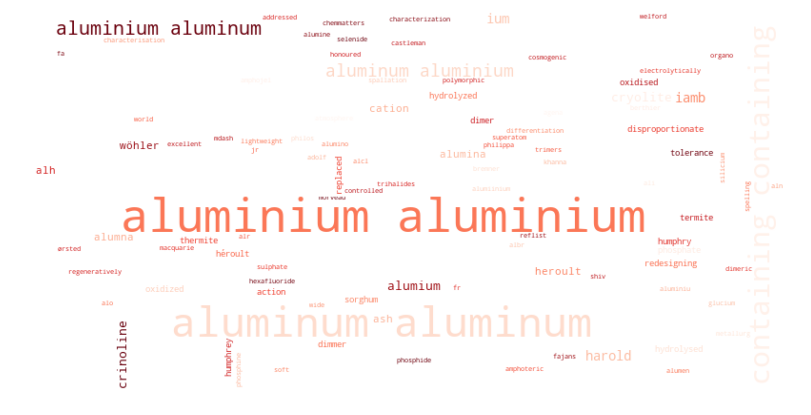

In [46]:
try:
    text = ' '.join(list(conflictTokenList['str']))
        
    wc = WordCloud(max_words=100,width=800, height=400,background_color='white',max_font_size = 50,colormap="Reds").generate(text)
    plt.figure(figsize=(14,7))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
except ValueError:
    print('It is not possible to create a WordCloud with this filter!')

In [121]:
%%html
<a href='notebook4.ipynb' target="_blank">Go to Workbook four</a>